In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (8,6)
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['font.size'] = 15
plt.rcParams['lines.markersize'] = 3

# Constantes físicas
hbar_MKS = 1.0545718e-34 # J s
c_MKS = 299792458 # m/s
proton_mass = 1.6726219e-27 # kg
neutron_mass = 1.6749275e-27 # kg
m_nuc_MKS = (proton_mass + neutron_mass)/2.0 # kg
e_MKS = 1.602186021766e-19 # C
# Algunas converciones útiles (multiplicar al primero para obtener el segundo)
Kg_to_fm11 = c_MKS/hbar_MKS*1e-15 # kg to fm^-1
MeV_to_fm11 = e_MKS/(hbar_MKS*c_MKS*1e9) # MeV to fm^-1
MeVfm_to_Jm  = 1e51*e_MKS # MeV/fm^3 to J/m^3
# Definimos las constantes necesarias en unidades naturales
m_nuc = m_nuc_MKS * Kg_to_fm11 # fm^-1
lambda_ = m_nuc**4 # Constante de escala empleada
rho_0_lambda = lambda_/2 # Escala de energía y presión empleada

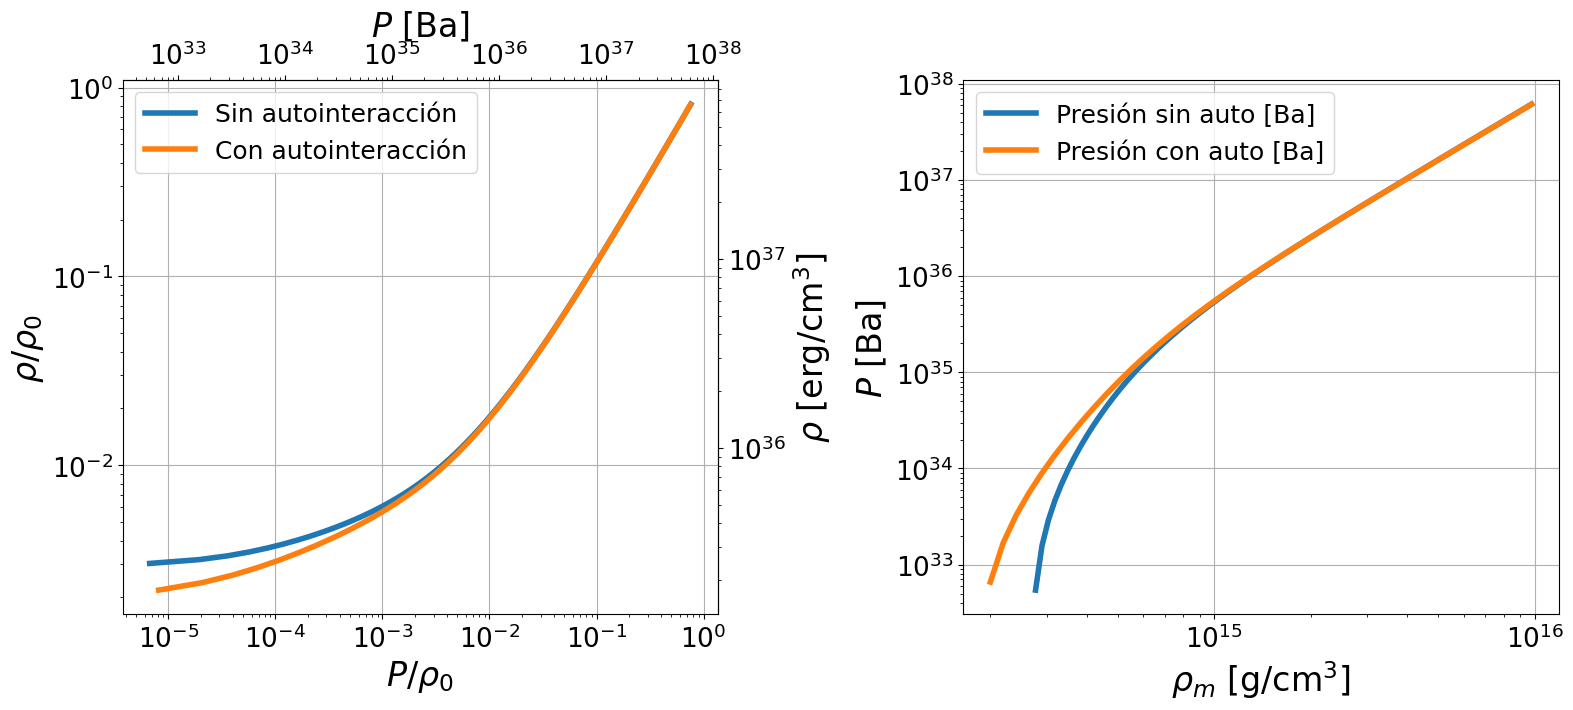

In [85]:
# Leer los datos de los dos archivos CSV
df_sin_auto = pd.read_csv('SigmaOmega_rho0_lambda_A_propios.csv')
#pasamos n de 1/kg3 a 1/fm3 en sin_auto
df_sin_auto['n'] = df_sin_auto['n'] * 1e-45
df_con_auto = pd.read_csv('SigmaOmegaAuto_rho0_lambda_A_propios.csv')
#quitamos el primer punto de con_auto
df_con_auto = df_con_auto.iloc[1:]

# Seleccionamos los datos hasta una densidad de 1e16g/cm3
densidad_max = 1e16 * 1e3/m_nuc_MKS # 1/m^3
densidad_max = densidad_max * 1e-45 # 1/fm^3
df_sin_auto = df_sin_auto[df_sin_auto['n'] < densidad_max]
df_con_auto = df_con_auto[df_con_auto['n'] < densidad_max]

# Parámetros de conversión
rho_MKSTocgs = 10
conv = rho_0_lambda / MeV_to_fm11 * MeVfm_to_Jm * rho_MKSTocgs

label_fontsize = 24
tick_fontsize = 19
legend_fontsize = 18
title_fontsize = 26
line_width = 4
marker_size = 6

# Figura con dos subfiguras
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

# ----- Subfigura 1: Ecuación de estado -----
ax1.loglog(df_sin_auto['P'], df_sin_auto['E'], "-", label='Sin autointeracción', linewidth=line_width, markersize=marker_size)
ax1.loglog(df_con_auto['P'], df_con_auto['E'], "-", label='Con autointeracción', linewidth=line_width, markersize=marker_size)
ax1.set_xlabel(r'$P/\rho_0$', fontsize=label_fontsize)
ax1.set_ylabel(r'$\rho/\rho_0$', fontsize=label_fontsize)
ax1.tick_params(axis='both', which='major', labelsize=tick_fontsize)

secax_x = ax1.secondary_xaxis('top', functions=(lambda x: x * conv, lambda x: x / conv))
secax_x.set_xlabel(r'$P$ [Ba]', fontsize=label_fontsize)
secax_x.tick_params(axis='x', labelsize=tick_fontsize)
secax_y = ax1.secondary_yaxis('right', functions=(lambda x: x * conv, lambda x: x / conv))
secax_y.set_ylabel(r'$\rho$ [erg/cm$^3$]', fontsize=label_fontsize)
secax_y.tick_params(axis='y', labelsize=tick_fontsize)

ax1.legend(fontsize=legend_fontsize)
ax1.grid()

# ----- Subfigura 2: P y energía vs densidad de masa -----
x_sin_auto = df_sin_auto['n'] * 1e45 * m_nuc_MKS * 1e-3
x_con_auto = df_con_auto['n'] * 1e45 * m_nuc_MKS * 1e-3

p_sin_auto = df_sin_auto['P'] * conv
e_sin_auto = df_sin_auto['E'] * conv
p_con_auto = df_con_auto['P'] * conv
e_con_auto = df_con_auto['E'] * conv

ax2.loglog(x_sin_auto, p_sin_auto, "-", label='Presión sin auto [Ba]', linewidth=line_width, markersize=marker_size)
# ax2.loglog(x_sin_auto, e_sin_auto, "-", label='Energía sin auto [erg/cm$^3$]', linewidth=line_width, markersize=marker_size)
ax2.loglog(x_con_auto, p_con_auto, "-", label='Presión con auto [Ba]', linewidth=line_width, markersize=marker_size)
# ax2.loglog(x_con_auto, e_con_auto, "-", label='Energía con auto [erg/cm$^3$]', linewidth=line_width, markersize=marker_size)

ax2.set_xlabel(r'$\rho_m$ [g/cm$^3$]', fontsize=label_fontsize)
ax2.set_ylabel(r'$P$ [Ba]', fontsize=label_fontsize)
ax2.tick_params(axis='both', which='major', labelsize=tick_fontsize)
ax2.legend(fontsize=legend_fontsize)
ax2.grid()

# fig.suptitle(r'Comparación de ecuaciones de estado', fontsize=title_fontsize)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


In [78]:
import matplotlib.colors as mcolors

# Leer los datos
mr_sin = pd.read_csv('../results/MasaRadio_SigmaOmega_rho0_lambda_A_propios.csv')
mr_con = pd.read_csv('../results/MasaRadio_SigmaOmegaAuto_rho0_lambda_A_propios.csv')

# Reducimos los datos hasta rho_m = 1e16 g/cm3
mr_sin = mr_sin[mr_sin['rho_m'] < 1e16]
mr_con = mr_con[mr_con['rho_m'] < 1e16]

# Le quitamos el primer punto de mr_sin
mr_sin = mr_sin.iloc[1:]

# Colormap y normalización para la densidad de masa (ambos datasets juntos)
densidad_all = np.concatenate([mr_sin['rho_m'].values, mr_con['rho_m'].values])
norm = mcolors.LogNorm(vmin=densidad_all.min(), vmax=densidad_all.max())
cmap = mcolors.LinearSegmentedColormap.from_list("custom_cmap", ["cornflowerblue", "darkorchid"])

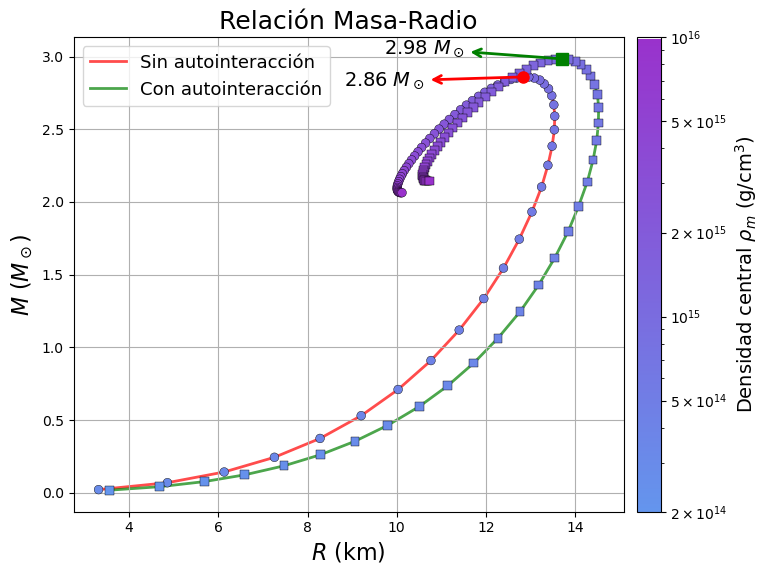

In [79]:
fig, ax = plt.subplots(figsize=(8,6))

# Graficar sin autointeracción (primero la línea, luego el scatter)
ax.plot(mr_sin['Radio'], mr_sin['Masa'], color='red', linewidth=2, alpha=0.7, label='Sin autointeracción', zorder=1)
sc1 = ax.scatter(mr_sin['Radio'], mr_sin['Masa'], c=mr_sin['rho_m'], cmap=cmap, norm=norm, s=40, marker='o', edgecolor='k', linewidth=0.3, zorder=2)

# Graficar con autointeracción (primero la línea, luego el scatter)
ax.plot(mr_con['Radio'], mr_con['Masa'], color='green', linewidth=2, alpha=0.7, label='Con autointeracción', zorder=1)
sc2 = ax.scatter(mr_con['Radio'], mr_con['Masa'], c=mr_con['rho_m'], cmap=cmap, norm=norm, s=40, marker='s', edgecolor='k', linewidth=0.3, zorder=2)

# Hallamos los puntos máximos de masa
masa_max_sin = mr_sin['Masa'].max()
masa_max_con = mr_con['Masa'].max()
radio_max_sin = mr_sin.loc[mr_sin['Masa'] == masa_max_sin, 'Radio'].values[0]
radio_max_con = mr_con.loc[mr_con['Masa'] == masa_max_con, 'Radio'].values[0]

# Punto máximo de masa sin autointeracción
ax.plot(radio_max_sin, masa_max_sin, 'o', color='red', markersize=8, label=None)
ax.annotate(f'{masa_max_sin:.2f} $M_\\odot$', 
            xy=(radio_max_sin, masa_max_sin), 
            xytext=(radio_max_sin-4, masa_max_sin-0.1),
            textcoords='data',
            arrowprops=dict(arrowstyle="<-", color='red', lw=2),
            color='black', fontsize=14, ha='left', va='bottom')

# Punto máximo de masa con autointeracción
ax.plot(radio_max_con, masa_max_con, 's', color='green', markersize=8, label=None)
ax.annotate(f'{masa_max_con:.2f} $M_\\odot$', 
            xy=(radio_max_con, masa_max_con), 
            xytext=(radio_max_con-4, masa_max_con),
            textcoords='data',
            arrowprops=dict(arrowstyle="<-", color='green', lw=2),
            color='black', fontsize=14, ha='left', va='bottom')

# Etiquetas y leyenda
ax.set_xlabel(r'$R$ (km)', fontsize=16)
ax.set_ylabel(r'$M$ ($M_\odot$)', fontsize=16)
ax.set_title('Relación Masa-Radio', fontsize=18)
ax.legend(fontsize=13)
ax.grid(True)

# Barra de color
cbar = plt.colorbar(sc2, ax=ax, pad=0.02)
cbar.set_label(r'Densidad central $\rho_m$ (g/cm$^3$)', fontsize=14)

# Definir los ticks en la escala logarítmica de la densidad
ticks = [2e14, 5e14, 1e15, 2e15, 5e15, 1e16]
cbar.set_ticks(ticks)
cbar.set_ticklabels([f"$10^{{{int(np.log10(tick))}}}$" if str(tick)[0] == "1" else f"${int(tick/10**int(np.log10(tick)))}\\times 10^{{{int(np.log10(tick))}}}$" for tick in ticks])

plt.tight_layout()
plt.show()
